In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
cols = ['preg', 'glu', 'bp', 'skin', 'ins', 'bmi', 'pedi', 'age', 'target']
final_df = pd.read_csv(url, names=cols)

In [3]:
final_df['f1_risk'] = ((final_df['glu'] > 125).astype(int) + (final_df['bmi'] >= 30).astype(int))
final_df['f2_ratio'] = final_df['glu'] / (final_df['ins'] + 1)
final_df['f3_obese'] = (final_df['bmi'] >= 30).astype(int)
final_df['f4_hp'] = (final_df['bp'] > 80).astype(int)
final_df['f5_gen'] = final_df['pedi'] * final_df['age']

In [4]:
final_df['f6_log_bmi'] = np.log1p(final_df['bmi'])
final_df['f7_skin_std'] = (final_df['skin'] - final_df['skin'].mean()) / final_df['skin'].std()
final_df['f8_preg_rt'] = final_df['preg'] / (final_df['age'] - 17).replace(0, 1)
final_df['f9_glu_str'] = (final_df['glu'] > 140).astype(int)
final_df['f10_senior'] = (final_df['age'] > 45).astype(int)
final_df = final_df.fillna(0)

In [5]:
y = final_df['target']
X_old = final_df[['preg', 'glu', 'bp', 'skin', 'ins', 'bmi', 'pedi', 'age']]
X_tr_o, X_ts_o, y_tr, y_ts = train_test_split(X_old, y, test_size=0.2, random_state=42)

In [6]:
X_new = final_df[['f1_risk', 'f2_ratio', 'f3_obese', 'f4_hp', 'f5_gen', 'f6_log_bmi', 'f7_skin_std', 'f8_preg_rt', 'f9_glu_str', 'f10_senior']]
X_tr_n, X_ts_n, _, _ = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [7]:
model_old = RandomForestClassifier(random_state=42).fit(X_tr_o, y_tr)
model_new = RandomForestClassifier(random_state=42).fit(X_tr_n, y_tr)

In [8]:
print("--- METRICS BEFORE ---")
print(classification_report(y_ts, model_old.predict(X_ts_o)))

--- METRICS BEFORE ---
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [9]:
print("--- METRICS AFTER ---")
print(classification_report(y_ts, model_new.predict(X_ts_n)))

--- METRICS AFTER ---
              precision    recall  f1-score   support

           0       0.79      0.80      0.79        99
           1       0.63      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



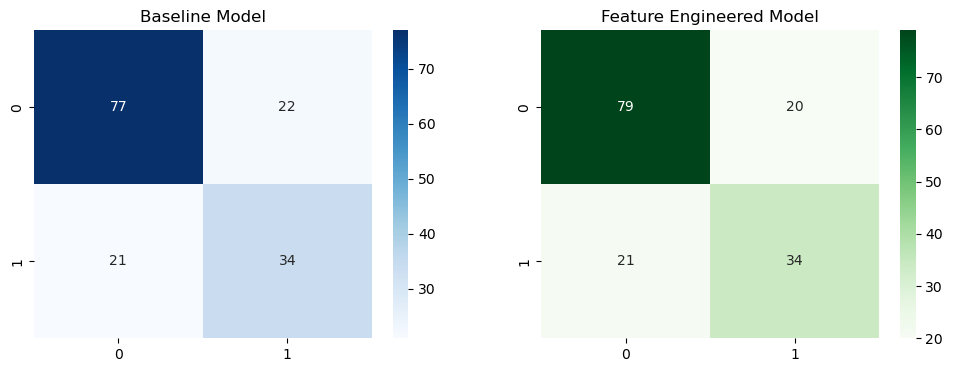

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_ts, model_old.predict(X_ts_o)), annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Baseline Model')
sns.heatmap(confusion_matrix(y_ts, model_new.predict(X_ts_n)), annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title('Feature Engineered Model')
plt.show()

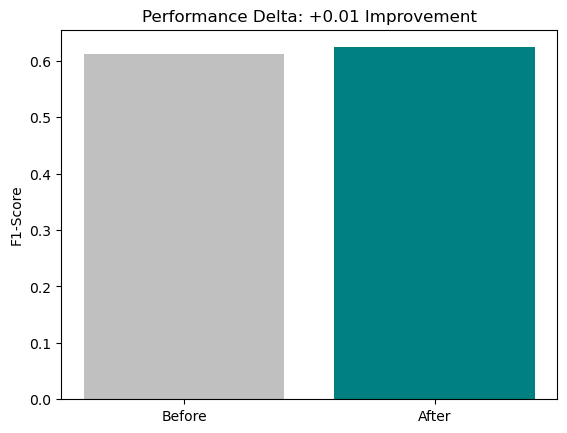

In [11]:
f1_o, f1_n = f1_score(y_ts, model_old.predict(X_ts_o)), f1_score(y_ts, model_new.predict(X_ts_n))
plt.bar(['Before', 'After'], [f1_o, f1_n], color=['silver', 'teal'])
plt.title(f'Performance Delta: +{f1_n - f1_o:.2f} Improvement')
plt.ylabel('F1-Score')
plt.show()

In [12]:
print("Diabetes Model by Hadiqa Khan")

Diabetes Model by Hadiqa Khan
